<a href="https://colab.research.google.com/github/ImagingDataCommons/IDC-Tutorials/blob/master/notebooks/pathomics/slide_microscopy_metadata_search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring IDC slide microscopy images metadata

[NCI Imaging Data Commons (IDC)](https://imaging.datacommons.cancer.gov) is a cloud-based environment offering a growing collection of publicly available images co-located with the tools and computational resources.

This tutorial demonstrates how to search microscopy images available in IDC programmatically. If you are new to IDC, you can check out other IDC tutorials available in [this repository](https://github.com/ImagingDataCommons/IDC-Tutorials). In particular, you may want to check [this introductory tutorial](https://github.com/ImagingDataCommons/IDC-Tutorials/blob/master/notebooks/pathomics/getting_started_with_digital_pathology.ipynb) focused on working with microscopy images.

If you have any questions about this tutorial or about IDC, please ask those on [IDC Forum](https://discourse.canceridc.dev).

--

Initial version: Sept 2024

Updated: Sept 2025

## Prerequisites

This tutorial depends on [`idc-index`](https://github.com/imagingdatacommons/idc-index) python package that is maintained by IDC and provides convenince interface to IDC content, and several other open source packages for data wrangling and plotting.

In [ ]:
%%capture
!pip install --upgrade idc-index
!pip install seaborn

## Accessing microscopy images metadata

In the following, we will instantiate `IDCClient`, which is provided by the `idc-index` package. This class maintains several tables, or _indices_, that contain metadata allowing to search the data in IDC. Metadata accompanying the microscopy images is located in a dedicated index named `sm_index` for "slide microscopy". `sm_index` is not installed by default, and needs to be fetched.

In [ ]:
from idc_index import IDCClient

idc_client = IDCClient()
idc_client.fetch_index('sm_index')

With `sm_index` installed, we can examine its content.

In [ ]:
idc_client.sm_index

,SeriesInstanceUID,embeddingMedium_CodeMeaning,embeddingMedium_code_designator_value_str,tissueFixative_CodeMeaning,tissueFixative_code_designator_value_str,staining_usingSubstance_CodeMeaning,staining_usingSubstance_code_designator_value_str,min_PixelSpacing_2sf,max_TotalPixelMatrixColumns,max_TotalPixelMatrixRows,ObjectiveLensPower,primaryAnatomicStructure_code_designator_value_str,primaryAnatomicStructure_CodeMeaning,primaryAnatomicStructureModifier_code_designator_value_str,primaryAnatomicStructureModifier_CodeMeaning,illuminationType_code_designator_value_str,illuminationType_CodeMeaning,admittingDiagnosis_code_designator_value_str,admittingDiagnosis_CodeMeaning
0,1.3.6.1.4.1.5962.99.1.1999238990.1245876537.16...,[Paraffin wax],[SCT:311731000],[Formalin],[SCT:431510009],"[water soluble eosin stain, hematoxylin stain]","[SCT:36879007, SCT:12710003]",0.00051,15936,23795,20,SCT:64163001,Head of pancreas,None,None,DCM:111744,Brightfield illumination,None,None
1,1.3.6.1.4.1.5962.99.1.3596125381.520474015.163...,[Paraffin wax],[SCT:311731000],[Formalin],[SCT:431510009],"[hematoxylin stain, water soluble eosin stain]","[SCT:12710003, SCT:36879007]",0.00025,159359,59483,40,SCT:9875009,Thymus,SCT:86049000,"Neoplasm, Primary",DCM:111744,Brightfield illumination,None,None
2,1.3.6.1.4.1.5962.99.1.2002310088.732291731.163...,[Paraffin wax],[SCT:311731000],[Formalin],[SCT:431510009],"[water soluble eosin stain, hematoxylin stain]","[SCT:36879007, SCT:12710003]",0.00025,61752,56142,40,SCT:71400007,Mesothelium,SCT:86049000,"Neoplasm, Primary",DCM:111744,Brightfield illumination,None,None
3,1.3.6.1.4.1.5962.99.1.2471421771.601333413.172...,[Paraffin wax],[SCT:311731000],[PAXgene Tissue System],[NCIt:C185113],"[hematoxylin stain, water soluble eosin stain]","[SCT:12710003, SCT:36879007]",0.00049,43823,28175,20,SCT:30737000,Renal medulla,None,None,DCM:111744,Brightfield illumination,None,None
4,1.3.6.1.4.1.5962.99.1.3373247221.766806885.168...,[Paraffin wax],[SCT:311731000],[Formalin],[SCT:431510009],"[water soluble eosin stain, hematoxylin stain]","[SCT:36879007, SCT:12710003]",0.00025,63743,79364,40,SCT:816092008,Pelvis,None,None,DCM:111744,Brightfield illumination,SCT:302847003,Rhabdomyosarcoma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69309,1.3.6.1.4.1.5962.99.1.3099726187.158896121.163...,[Paraffin wax],[SCT:311731000],[Formalin],[SCT:431510009],"[hematoxylin stain, water soluble eosin stain]","[SCT:12710003, SCT:36879007]",0.00025,119952,73815,40,SCT:35039007,Uterus,SCT:86049000,"Neoplasm, Primary",DCM:111744,Brightfield illumination,None,None
69310,1.3.6.1.4.1.5962.99.1.296758449.778092481.1640...,[],[],[],[],"[hematoxylin stain, water soluble eosin stain]","[SCT:12710003, SCT:36879007]",0.00049,57767,17666,20,SCT:35039007,Uterus,SCT:86049000,"Neoplasm, Primary",DCM:111744,Brightfield illumination,None,None
69311,1.3.6.1.4.1.5962.99.1.288981992.1793344149.164...,[],[],[],[],"[water soluble eosin stain, hematoxylin stain]","[SCT:36879007, SCT:12710003]",0.00049,23903,46659,20,SCT:35039007,Uterus,SCT:86049000,"Neoplasm, Primary",DCM:111744,Brightfield illumination,None,None
69312,1.3.6.1.4.1.5962.99.1.293037520.1139250249.164...,[],[],[],[],"[water soluble eosin stain, hematoxylin stain]","[SCT:36879007, SCT:12710003]",0.00049,75695,25744,20,SCT:35039007,Uterus,SCT:86049000,"Neoplasm, Primary",DCM:111744,Brightfield illumination,None,None


In [ ]:
print(f'Attributes in sm_index: \n{idc_client.sm_index.dtypes}\n')

Attributes in sm_index: 
SeriesInstanceUID                                              object
embeddingMedium_CodeMeaning                                    object
embeddingMedium_code_designator_value_str                      object
tissueFixative_CodeMeaning                                     object
tissueFixative_code_designator_value_str                       object
staining_usingSubstance_CodeMeaning                            object
staining_usingSubstance_code_designator_value_str              object
min_PixelSpacing_2sf                                          float64
max_TotalPixelMatrixColumns                                     Int64
max_TotalPixelMatrixRows                                        Int64
ObjectiveLensPower                                              Int64
primaryAnatomicStructure_code_designator_value_str             object
primaryAnatomicStructure_CodeMeaning                           object
primaryAnatomicStructureModifier_code_designator_value_str     ob

The columns of this index are extracted from the DICOM metadata contained in the images. Here's a quick explanation of some of those columns, which are documented in https://idc-index.readthedocs.io/en/latest/column_descriptions.html#sm-index (you can check out [this notebook](https://github.com/ImagingDataCommons/IDC-Tutorials/blob/master/notebooks/pathomics/getting_started_with_digital_pathology.ipynb) for an introduction into how DICOM SM images are organized):
* `SeriesInstanceUID`: this is a unique identifier of the DICOM series containing the image: one DICOM series = one slide
* `embeddingMedium`, `tissueFixative` and `staining_usingSubstance` describe processing the specimen underwent before the image was obtained
* `max_TotalPixelMatrixColumns` and `max_TotalMatrixRows` are the dimensions of the image at the maximum resolution
* `min_PixelSpacing_2sf`: pixel spacing at the maximum resolution layer, rounded to 2 significant figures
* `ObjectiveLensPower`: power of the objective lens of the equipment used to digitize the slide
* `primaryAnatomicStructure`: anatomic location from where the imaged specimen was collected
* `primaryAnatomicStructureModifier`: this column may contain additional characteristics of the specimen, such as whether it is a tumor or normal tissue
* `admittingDiagnosis`: diagnosis of the patient, if available

`sm_index` is just a pandas dataframe. In the following we make a plot that - effectively - counts the number of slides digitized using different objective lens power.

In DICOM data model, `SeriesInstanceUID` is a unique identifier that corresponds to a single slide.

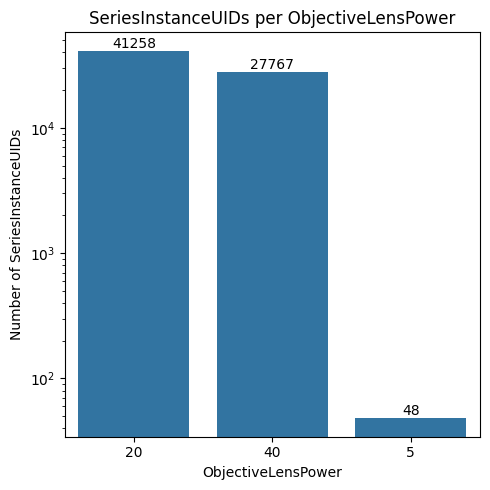

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Count the number of items in SeriesInstanceUID for each distinct ObjectiveLensPower
count_data = idc_client.sm_index.groupby('ObjectiveLensPower')['SeriesInstanceUID'].count().reset_index()
count_data = count_data.sort_values('SeriesInstanceUID', ascending=False)

# Convert ObjectiveLensPower to string to treat it as a categorical variable
count_data['ObjectiveLensPower'] = count_data['ObjectiveLensPower'].astype(str)

# Create the bar plot
plt.figure(figsize=(5, 5))
ax = sns.barplot(x='ObjectiveLensPower', y='SeriesInstanceUID', data=count_data,
                 order=count_data['ObjectiveLensPower'])
ax.set_yscale('log')

# Add count labels on top of each bar
for i, bar in enumerate(ax.patches):
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{int(height)}',
        ha='center',
        va='bottom',
        fontsize=10
    )

# Customize the plot
plt.title('SeriesInstanceUIDs per ObjectiveLensPower')
plt.xlabel('ObjectiveLensPower')
plt.ylabel('Number of SeriesInstanceUIDs')


# Show the plot
plt.tight_layout()
plt.show()

Once you have an idea about the values for a given metadata attribute, you can subset the slides that have a specific value. In the next cell we select all slides that were scanned with 5x `ObjectiveLensPower`.

In [ ]:
slides_5x = idc_client.sm_index[idc_client.sm_index['ObjectiveLensPower'] == 5]
slides_5x

,SeriesInstanceUID,embeddingMedium_CodeMeaning,embeddingMedium_code_designator_value_str,tissueFixative_CodeMeaning,tissueFixative_code_designator_value_str,staining_usingSubstance_CodeMeaning,staining_usingSubstance_code_designator_value_str,min_PixelSpacing_2sf,max_TotalPixelMatrixColumns,max_TotalPixelMatrixRows,ObjectiveLensPower,primaryAnatomicStructure_code_designator_value_str,primaryAnatomicStructure_CodeMeaning,primaryAnatomicStructureModifier_code_designator_value_str,primaryAnatomicStructureModifier_CodeMeaning,illuminationType_code_designator_value_str,illuminationType_CodeMeaning,admittingDiagnosis_code_designator_value_str,admittingDiagnosis_CodeMeaning
9335,1.3.6.1.4.1.5962.99.1.1144967520.122742132.163...,[Tissue freezing medium],[SCT:433469005],[],[],"[hematoxylin stain, water soluble eosin stain]","[SCT:12710003, SCT:36879007]",0.002,4676,5103,5,SCT:12738006,Brain,SCT:86049000,"Neoplasm, Primary",DCM:111744,Brightfield illumination,None,None
9340,1.3.6.1.4.1.5962.99.1.1143764909.1848068707.16...,[Tissue freezing medium],[SCT:433469005],[],[],"[water soluble eosin stain, hematoxylin stain]","[SCT:36879007, SCT:12710003]",0.002,4676,5199,5,SCT:12738006,Brain,SCT:86049000,"Neoplasm, Primary",DCM:111744,Brightfield illumination,None,None
9530,1.3.6.1.4.1.5962.99.1.1126803882.1132778094.16...,[Tissue freezing medium],[SCT:433469005],[],[],"[hematoxylin stain, water soluble eosin stain]","[SCT:12710003, SCT:36879007]",0.002,10287,4387,5,SCT:12738006,Brain,SCT:86049000,"Neoplasm, Primary",DCM:111744,Brightfield illumination,None,None
9886,1.3.6.1.4.1.5962.99.1.1161772215.1881002667.16...,[Tissue freezing medium],[SCT:433469005],[],[],"[water soluble eosin stain, hematoxylin stain]","[SCT:36879007, SCT:12710003]",0.002,11223,6210,5,SCT:12738006,Brain,SCT:86049000,"Neoplasm, Primary",DCM:111744,Brightfield illumination,None,None
9981,1.3.6.1.4.1.5962.99.1.1417610265.99830249.1637...,[Tissue freezing medium],[SCT:433469005],[],[],"[hematoxylin stain, water soluble eosin stain]","[SCT:12710003, SCT:36879007]",0.002,9352,7152,5,SCT:12738006,Brain,SCT:86049000,"Neoplasm, Primary",DCM:111744,Brightfield illumination,None,None
10213,1.3.6.1.4.1.5962.99.1.1444087361.1178802190.16...,[Tissue freezing medium],[SCT:433469005],[],[],"[water soluble eosin stain, hematoxylin stain]","[SCT:36879007, SCT:12710003]",0.002,7014,4390,5,SCT:12738006,Brain,SCT:86049000,"Neoplasm, Primary",DCM:111744,Brightfield illumination,None,None
10247,1.3.6.1.4.1.5962.99.1.1146638441.2120788688.16...,[Tissue freezing medium],[SCT:433469005],[],[],"[water soluble eosin stain, hematoxylin stain]","[SCT:36879007, SCT:12710003]",0.002,9352,4666,5,SCT:12738006,Brain,SCT:86049000,"Neoplasm, Primary",DCM:111744,Brightfield illumination,None,None
10444,1.3.6.1.4.1.5962.99.1.1137743941.2014985547.16...,[Tissue freezing medium],[SCT:433469005],[],[],"[water soluble eosin stain, hematoxylin stain]","[SCT:36879007, SCT:12710003]",0.002,5143,5491,5,SCT:12738006,Brain,SCT:86049000,"Neoplasm, Primary",DCM:111744,Brightfield illumination,None,None
10682,1.3.6.1.4.1.5962.99.1.1146651654.710261411.163...,[Tissue freezing medium],[SCT:433469005],[],[],"[water soluble eosin stain, hematoxylin stain]","[SCT:36879007, SCT:12710003]",0.002,4208,5260,5,SCT:12738006,Brain,SCT:86049000,"Neoplasm, Primary",DCM:111744,Brightfield illumination,None,None
11071,1.3.6.1.4.1.5962.99.1.1147694984.1297962989.16...,[Tissue freezing medium],[SCT:433469005],[],[],"[hematoxylin stain, water soluble eosin stain]","[SCT:12710003, SCT:36879007]",0.002,11223,5668,5,SCT:12738006,Brain,SCT:86049000,"Neoplasm, Primary",DCM:111744,Brightfield illumination,None,None


Examining distinct values of the staining substance is a bit more involved, since there may be more than one such substance used (as an example, hematoxylin and eosin are often used together). This means that this column contains arrays, and to account for this we first "explode" this column - this will create a separate row for each element of the array.

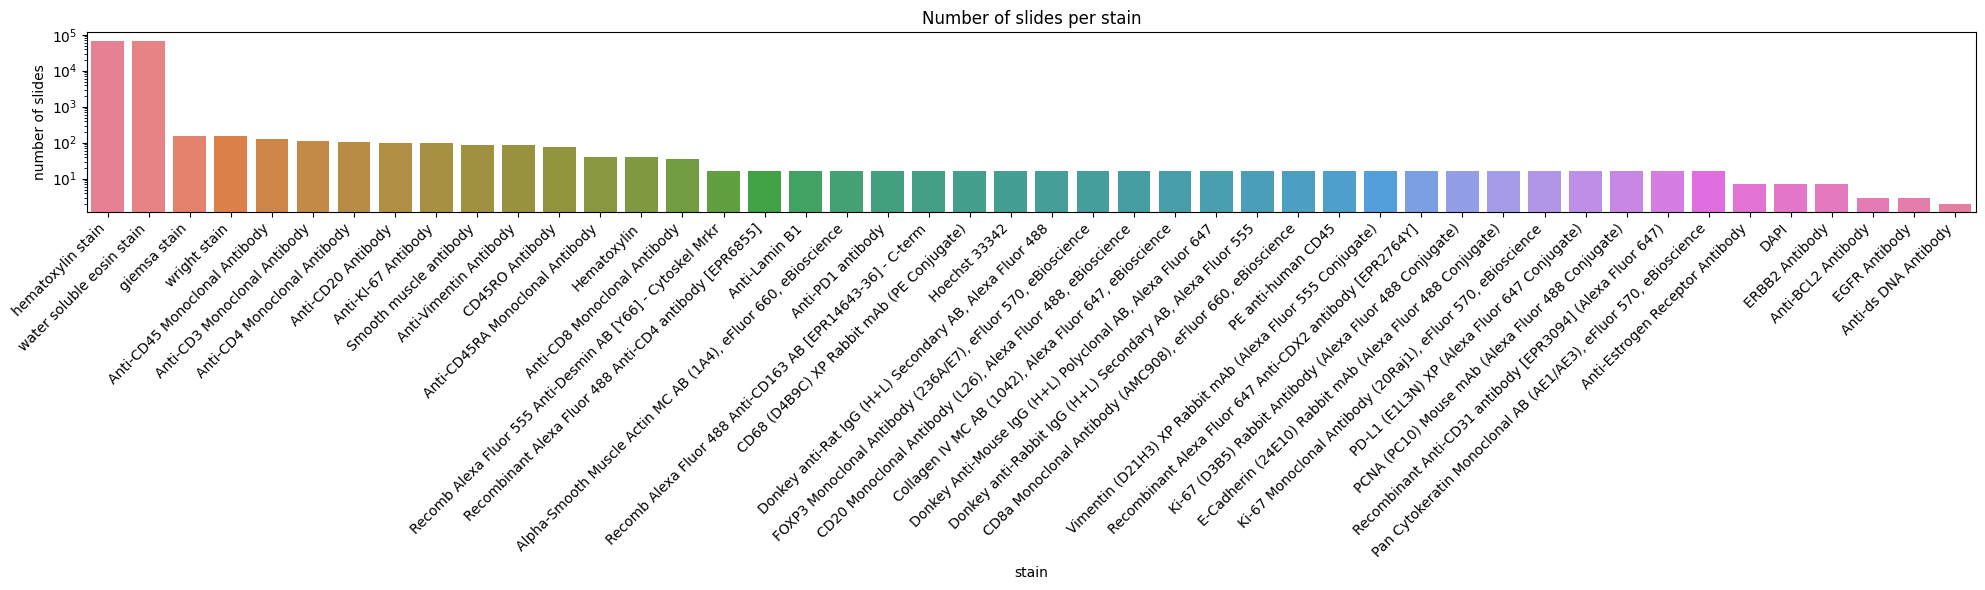

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# here we create a separate row for eache element in the 'staining_usingSubstance_CodeMeaning' column array
stain_count_data = idc_client.sm_index.explode('staining_usingSubstance_CodeMeaning').groupby('staining_usingSubstance_CodeMeaning')['SeriesInstanceUID'].count().reset_index()
stain_count_data = stain_count_data.sort_values('SeriesInstanceUID', ascending=False)

# Create the bar plot
plt.figure(figsize=(20, 6))
ax = sns.barplot(y='SeriesInstanceUID', x='staining_usingSubstance_CodeMeaning', data=stain_count_data,hue='staining_usingSubstance_CodeMeaning')
ax.set_yscale('log')

# Customize the plot
plt.title('Number of slides per stain')
plt.xlabel('stain')
plt.ylabel('number of slides')

# Rotate x-axis labels if needed
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

## Combining microscopy metadata with other metadata

`sm_index` table of `idc-index` contains metadata specific to slide microscopy. `idc-index` also contains the main index, which is installed by default, and can be accessed as follows. To learn more about this index, check out [this introductory tutorial](https://github.com/ImagingDataCommons/IDC-Tutorials/blob/master/notebooks/getting_started/part2_searching_basics.ipynb) and this documentation page: https://idc-index.readthedocs.io/en/latest/column_descriptions.html.

In [ ]:
print(f'Attributes in index: \n{idc_client.index.dtypes}\n')

Attributes in index: 
collection_id             object
analysis_result_id        object
PatientID                 object
SeriesInstanceUID         object
StudyInstanceUID          object
source_DOI                object
PatientAge                object
PatientSex                object
StudyDate                 object
StudyDescription          object
BodyPartExamined          object
Modality                  object
Manufacturer              object
ManufacturerModelName     object
SeriesDate                object
SeriesDescription         object
SeriesNumber              object
instanceCount              Int64
license_short_name        object
aws_bucket                object
crdc_series_uuid          object
series_aws_url            object
series_size_MB           float64
dtype: object



In [ ]:
idc_client.index.head()

,collection_id,analysis_result_id,PatientID,SeriesInstanceUID,StudyInstanceUID,source_DOI,PatientAge,PatientSex,StudyDate,StudyDescription,...,ManufacturerModelName,SeriesDate,SeriesDescription,SeriesNumber,instanceCount,license_short_name,aws_bucket,crdc_series_uuid,series_aws_url,series_size_MB
0,lidc_idri,None,LIDC-IDRI-0042,1.3.6.1.4.1.14519.5.2.1.6279.6001.280125803152...,1.3.6.1.4.1.14519.5.2.1.6279.6001.284028192986...,10.7937/k9/tcia.2015.lo9ql9sx,None,None,2000-01-01,None,...,LightSpeed VCT,2000-01-01,None,3000579,123,CC BY 3.0,idc-open-data,da0b07df-0ef7-4efc-8d08-517476eec407,s3://idc-open-data/da0b07df-0ef7-4efc-8d08-517...,64.75
1,upenn_gbm,None,UPENN-GBM-00370,1.3.6.1.4.1.14519.5.2.1.2124080571797641357837...,1.3.6.1.4.1.14519.5.2.1.2257953328133520977052...,10.7937/tcia.709x-dn49,068Y,M,2010-07-17,BrainTumor,...,TrioTim,2010-07-17,ep2d_perf BOLUS_T,13,900,CC BY 4.0,idc-open-data,b7403fcb-0f50-4676-88f6-d1b3366044e4,s3://idc-open-data/b7403fcb-0f50-4676-88f6-d1b...,33.25
2,phantom_fda,None,NoduleLayout_4,1.2.840.113704.1.111.4452.1224263108.103,1.2.840.113704.1.111.1628.1224255064.3,10.7937/k9/tcia.2015.orbjkmux,None,None,2008-10-17,Scanner-Philips_Exp-200_Pitch-0.9_SlCol-16x0.75mm,...,Mx8000 IDT 16,None,SliceTh-0.8_SliceInc-0.4_ReconFilter-C,151,749,CC BY-NC 3.0,idc-open-data-cr,5d4d4cf8-65e9-4868-9ab5-3c8267157bd2,s3://idc-open-data-cr/5d4d4cf8-65e9-4868-9ab5-...,393.96
3,qiba_ct_1c,None,QIBA_CT_1C,1.3.12.2.1107.5.1.4.54023.30000011021002131895...,1.3.12.2.1107.5.1.4.54023.30000011021001533310...,10.7937/k9/tcia.2016.yxgr4blu,055Y,O,2011-02-09,UCLA,...,Sensation 64,2011-02-09,SIEMENS AXIAL 100 mAs (200 mA) recon B60f - Th...,25,365,CC BY 3.0,idc-open-data,71d793fa-d815-407f-9142-4666d90c12be,s3://idc-open-data/71d793fa-d815-407f-9142-466...,192.57
4,stageii_colorectal_ct,None,StageII-Colorectal-CT-106,1.3.6.1.4.1.14519.5.2.1.1067234525139947737121...,1.3.6.1.4.1.14519.5.2.1.1072382132400209629830...,10.7937/p5k5-tg43,075Y,M,2006-06-07,Pelvic Cavity CT Routine+Enhanced,...,Sensation 64,2006-06-07,Pelvis 5.0 B31f,2,60,CC BY 4.0,idc-open-data,3ff3681b-3d8c-4135-9be9-4ad8f25490cd,s3://idc-open-data/3ff3681b-3d8c-4135-9be9-4ad...,31.65


`SeriesInstanceUID` is the common key between the main index and `sm_index`. We can join these two tables if we want to know, for example, which collection a given slide is coming from, where to learn more about this collection, or what is the size of the files corresponding to the slide.

In [ ]:
# join idc_client.sm_index and idc_client.index on SeriesInstanceUID, including
# in the result all of the columns from sm_index and collecton_id column from index
sm_with_main = pd.merge(idc_client.index[['collection_id','SeriesInstanceUID']], idc_client.sm_index, on='SeriesInstanceUID')
sm_with_main.head()

,collection_id,SeriesInstanceUID,embeddingMedium_CodeMeaning,embeddingMedium_code_designator_value_str,tissueFixative_CodeMeaning,tissueFixative_code_designator_value_str,staining_usingSubstance_CodeMeaning,staining_usingSubstance_code_designator_value_str,min_PixelSpacing_2sf,max_TotalPixelMatrixColumns,max_TotalPixelMatrixRows,ObjectiveLensPower,primaryAnatomicStructure_code_designator_value_str,primaryAnatomicStructure_CodeMeaning,primaryAnatomicStructureModifier_code_designator_value_str,primaryAnatomicStructureModifier_CodeMeaning,illuminationType_code_designator_value_str,illuminationType_CodeMeaning,admittingDiagnosis_code_designator_value_str,admittingDiagnosis_CodeMeaning
0,tcga_lusc,1.3.6.1.4.1.5962.99.1.1093848564.800344014.163...,[Paraffin wax],[SCT:311731000],[Formalin],[SCT:431510009],"[hematoxylin stain, water soluble eosin stain]","[SCT:12710003, SCT:36879007]",0.00025,108528,60039,40,SCT:39607008,Lung,SCT:86049000,"Neoplasm, Primary",DCM:111744,Brightfield illumination,None,None
1,nlst,1.3.6.1.4.1.5962.99.1.504181409.1641029743.164...,[Paraffin wax],[SCT:311731000],[Formalin],[SCT:431510009],"[water soluble eosin stain, hematoxylin stain]","[SCT:36879007, SCT:12710003]",0.00025,103698,80641,40,SCT:39607008,Lung,None,None,DCM:111744,Brightfield illumination,None,None
2,tcga_gbm,1.3.6.1.4.1.5962.99.1.1144194654.232389553.163...,[Paraffin wax],[SCT:311731000],[Formalin],[SCT:431510009],"[hematoxylin stain, water soluble eosin stain]","[SCT:12710003, SCT:36879007]",0.00050,90030,46904,20,SCT:12738006,Brain,SCT:86049000,"Neoplasm, Primary",DCM:111744,Brightfield illumination,None,None
3,cptac_ucec,1.3.6.1.4.1.5962.99.1.297879103.889227429.1640...,[],[],[],[],"[water soluble eosin stain, hematoxylin stain]","[SCT:36879007, SCT:12710003]",0.00049,61751,29970,20,SCT:35039007,Uterus,SCT:86049000,"Neoplasm, Primary",DCM:111744,Brightfield illumination,None,None
4,rms_mutation_prediction,1.3.6.1.4.1.5962.99.1.3697718289.32992254.1687...,[Paraffin wax],[SCT:311731000],[Formalin],[SCT:431510009],"[hematoxylin stain, water soluble eosin stain]","[SCT:12710003, SCT:36879007]",0.00025,105575,73092,40,SCT:40689003,Testis,SCT:24028007,Right,DCM:111744,Brightfield illumination,SCT:302847003,Rhabdomyosarcoma


Next we will make an summary of the stains encountered in the microscopy images available in IDC, but now summarized by individual collections. You will see that [`gtex` collection](https://doi.org/10.5281/zenodo.11099099) appears to be the largest (by the number of slides) collection, and it is composed solely of H&E-stained imaged tissue!

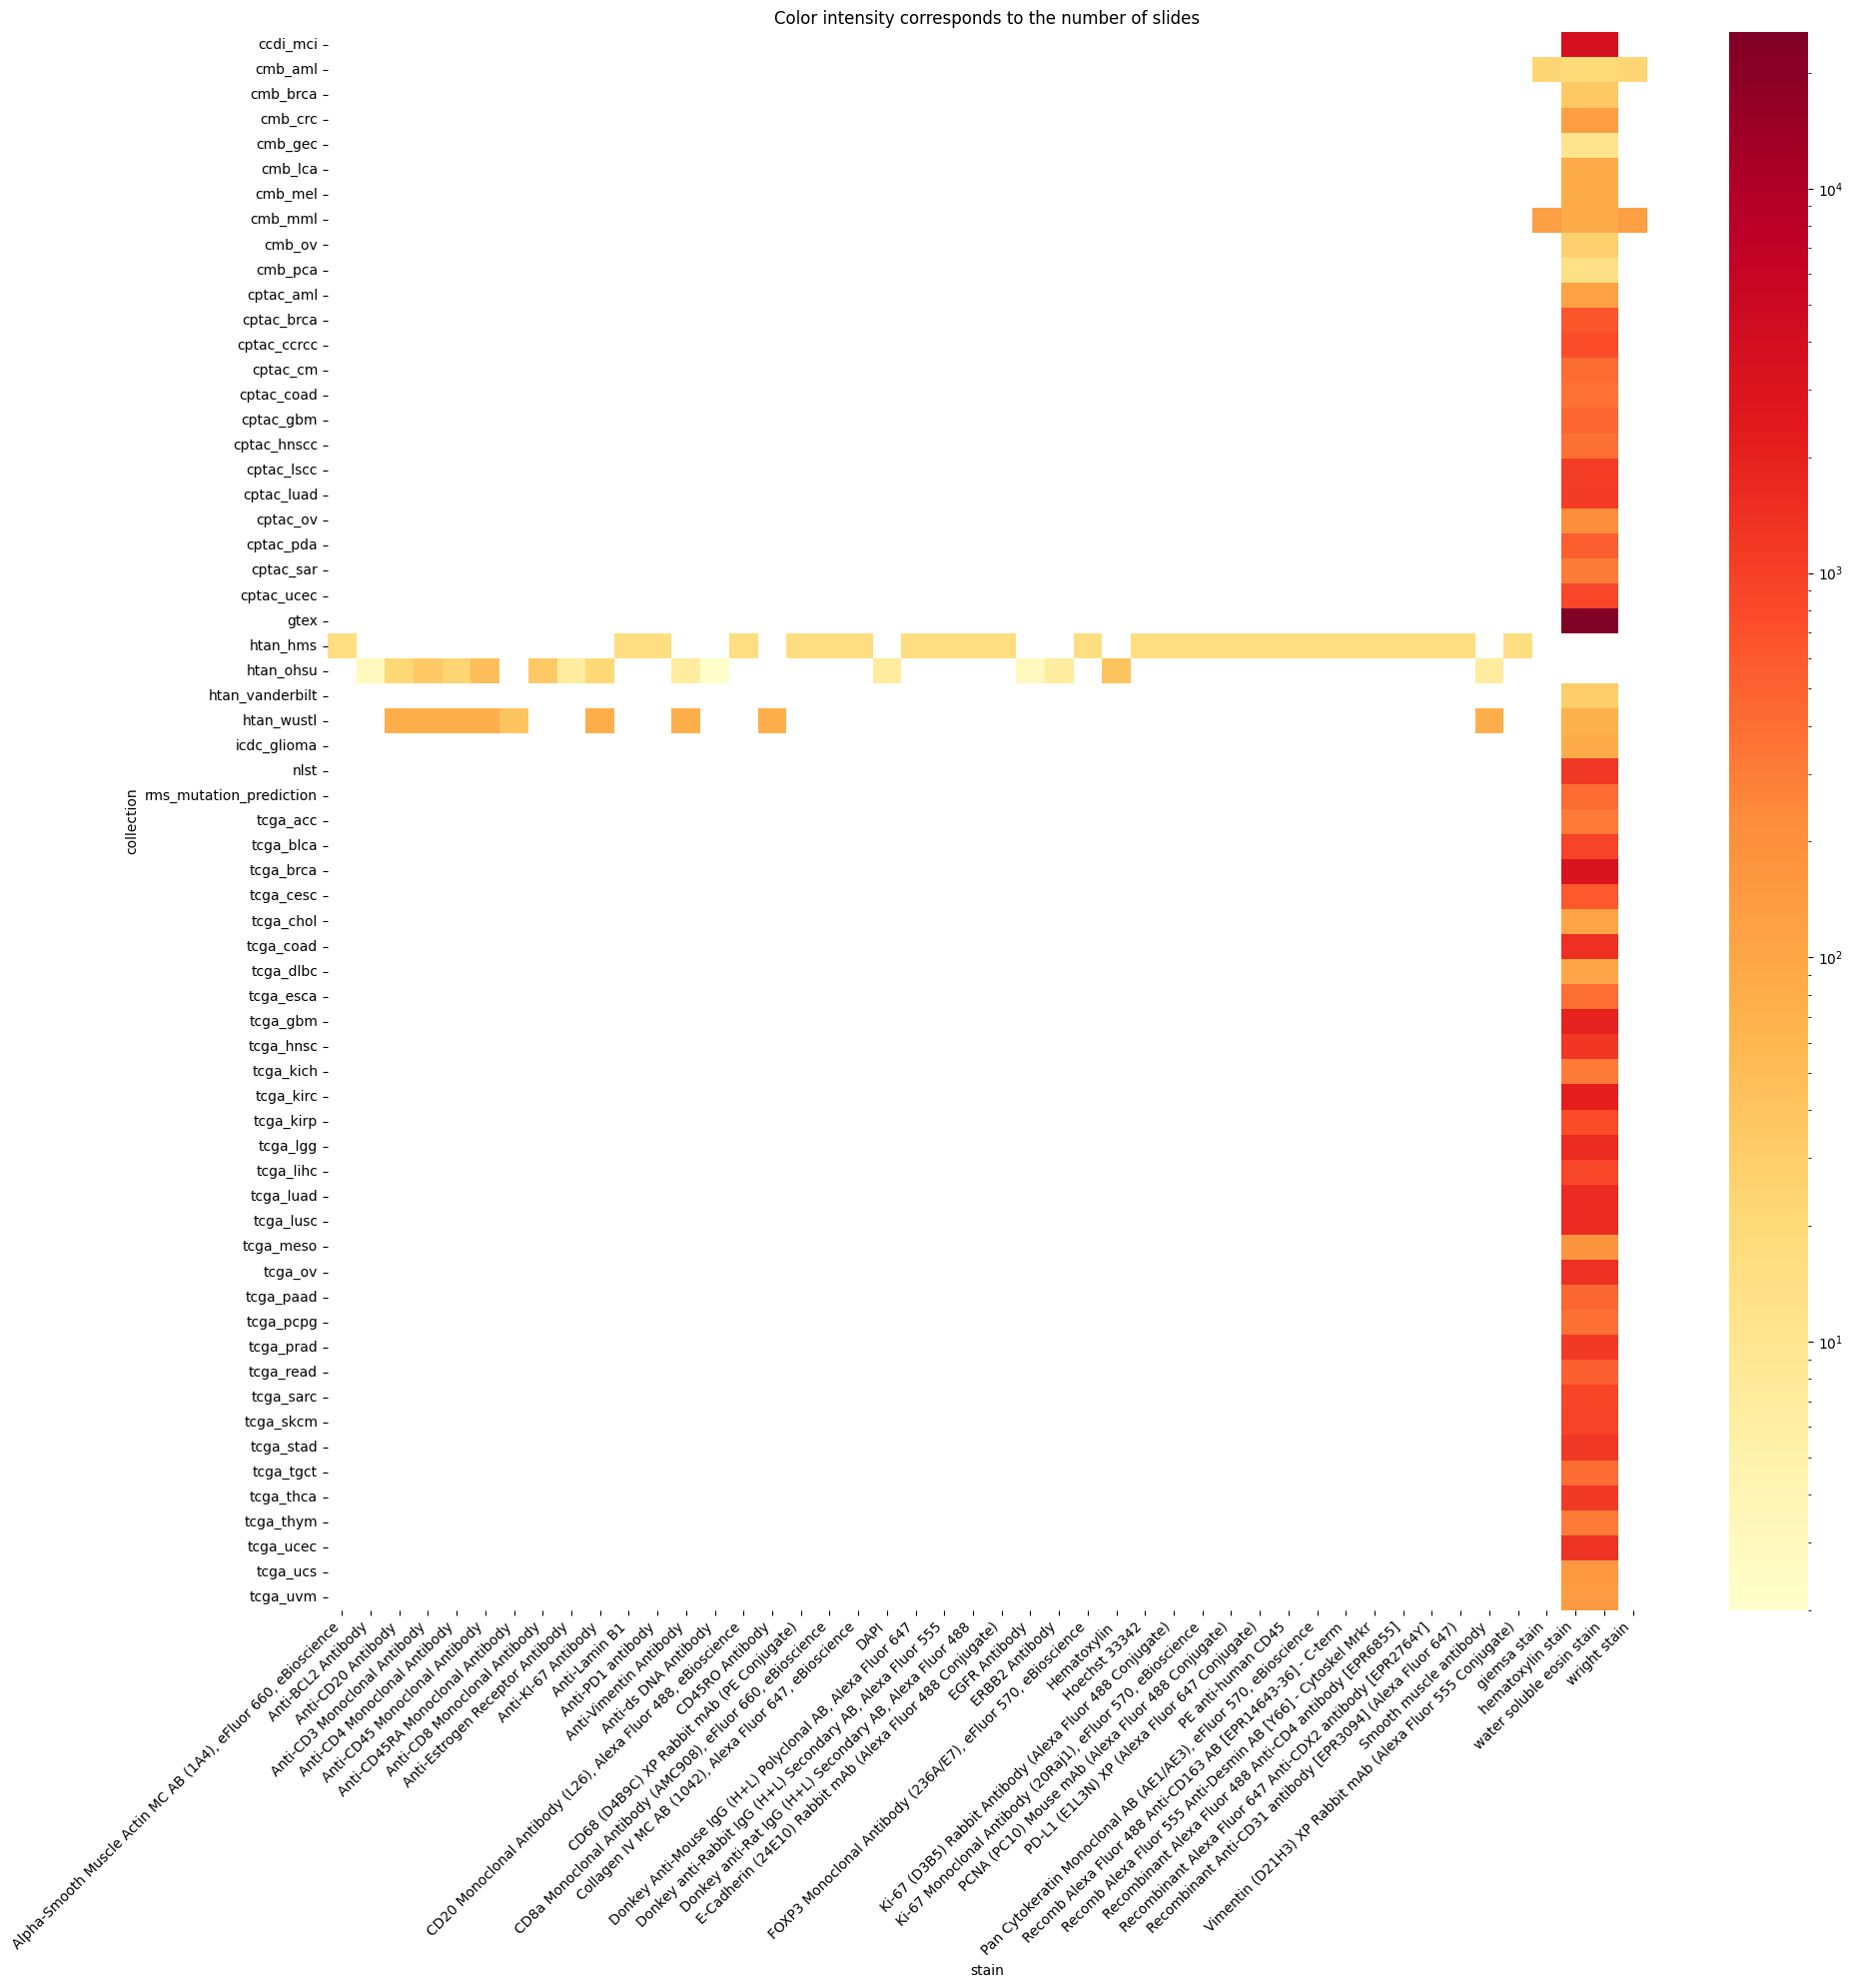

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Create a pivot table
pivot_table = sm_with_main.explode('staining_usingSubstance_CodeMeaning').pivot_table(values='SeriesInstanceUID', index='collection_id', columns='staining_usingSubstance_CodeMeaning', aggfunc='nunique', fill_value=0)

# Create the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(pivot_table, annot=False, cmap='YlOrRd', fmt='d', norm=LogNorm())

plt.title('Color intensity corresponds to the number of slides')
plt.xlabel('stain')
plt.ylabel('collection')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

## Learning more about slide provenance

DICOM data model includes attributes that can be used to describe what anatomic region the tissue in the slide is coming from, what is the morphology of this tissue, and what diagnosis was assigned to the patient at the time the slide was collected.

DICOM is strict about using defined terms from terminologies to describe the concepts we will be referring to here. This means that instead of free text each of those attributes contains a code tuple. DICOM code tuples consist of:
* `CodingSchemeDesignator`: defines the terminology where code is defined (e.g., "SCT" stands for [SNOMED International](http://www.snomed.org/) CT codes, and "ICDO3" is for "International Classification of Diseases for Oncology, 3rd Edition")
* `CodeValue`: string of text that refers to the specific code within the terminology
* `CodeMeaning`: human-readable meaning of the code

`sm_index` includes the following coded attributes:
* `primaryAnatomicStructure`: anatomic location from where the imaged specimen was collected
* `primaryAnatomicStructureModifier`: this column may contain additional characteristics of the specimen, such as whether it is a tumor or normal tissue
* `admittingDiagnosis`: diagnosis of the patient, if available

Each of the above are prefixes of the colums: these attributes exist with suffix `_code_designator_value_str` and `_CodeMeaning`, which indicates whether the column contains CodeSchemeDesignator and CodeValue, or CodeMeaning.

## Example: summarizing sample anatomy and admitting diagnosis for the `mci_ccdi` collection

Enough theory!

To illustrate how these attributes can help you navigate IDC data, in the following cell we will make an interactive scatter plot that breaks down the slides available in the [CCDI-MCI collection](https://doi.org/10.5281/zenodo.11099086) of IDC by the anatomic region and admitting diagnosis.

We will again combine SM-specific metadata and the attributes included in the main index to access `collection_id` attribute for the individual slides.

In [ ]:
import plotly.express as px

# join idc_client.sm_index and idc_client.index on SeriesInstanceUID, including
# in the result all of the columns from sm_index and collecton_id column from index
sm_with_main = pd.merge(idc_client.index[['collection_id','SeriesInstanceUID']], idc_client.sm_index, on='SeriesInstanceUID')

counts = sm_with_main[sm_with_main['collection_id']=='ccdi_mci'].groupby(
    ['primaryAnatomicStructure_CodeMeaning',
     'admittingDiagnosis_CodeMeaning']).size().reset_index(name='count')

fig = px.scatter(counts, x='primaryAnatomicStructure_CodeMeaning', y='admittingDiagnosis_CodeMeaning', size='count',
                 hover_data=['count'], color='count',
                 labels={'primaryAnatomicStructure_CodeMeaning': 'Primary Anatomic Structure',
                         'admittingDiagnosis_CodeMeaning': 'Admitting Diagnosis',
                         'count': 'Count'},
                 title='Scatter Plot of Primary Anatomic Structure vs. Admitting Diagnosis for the CCDI-MCI Collection')

fig.update_traces(marker=dict(sizemin=5))
fig.update_layout(
    xaxis_title='Primary Anatomic Structure',
    yaxis_title='Admitting Diagnosis',
    xaxis_tickangle=-45
)

fig.show()

## Sample type information

`primaryAnatomicStructureModifier` is used to capture the sample type.

In [ ]:
sm_with_main[sm_with_main['collection_id']=='ccdi_mci']['primaryAnatomicStructureModifier_CodeMeaning'].describe()


,primaryAnatomicStructureModifier_CodeMeaning
count,1804
unique,3
top,Tumor
freq,1798


In [ ]:
# join idc_client.sm_index and idc_client.index on SeriesInstanceUID, including
# in the result all of the columns from sm_index and collecton_id column from index
sm_with_main = pd.merge(idc_client.index[['collection_id','SeriesInstanceUID']], idc_client.sm_index, on='SeriesInstanceUID')

counts = sm_with_main[sm_with_main['collection_id']=='ccdi_mci'].groupby(
    ['primaryAnatomicStructure_CodeMeaning',
     'primaryAnatomicStructureModifier_CodeMeaning']).size().reset_index(name='count')

fig = px.scatter(counts, x='primaryAnatomicStructure_CodeMeaning', y='primaryAnatomicStructureModifier_CodeMeaning', size='count',
                 hover_data=['count'], color='count',
                 labels={'primaryAnatomicStructure_CodeMeaning': 'Primary Anatomic Structure',
                         'primaryAnatomicStructureModifier_CodeMeaning': 'primaryAnatomicStructureModifier (sample type)',
                         'count': 'Count'},
                 title='Scatter Plot of Primary Anatomic Structure vs. Sample Type for the CCDI-MCI Collection')

fig.update_traces(marker=dict(sizemin=5))
fig.update_layout(
    xaxis_title='Primary Anatomic Structure',
    yaxis_title='Sample Type',
    xaxis_tickangle=-45
)

fig.show()

## Downloading the image files

Once you found the slide(s) you need, you can download individual slides given `SeriesInstanceUID` using the `idc download` convenience command line tool installed as part of the `idc-index` package. The cell below will download the slide identified by `SeriesInstanceUID`=`1.3.6.1.4.1.5962.99.1.1963588793.523070908.1638346161337.2.0`, and will sort the downloaded files into the `collection_id>PatientID>StudyInstanceUID>SeriesInstanceUID` DICOM hierarchy.

You can also download the entire collection by passing its ID (just make sure you have enough disk space!).

In [ ]:
!idc download 1.3.6.1.4.1.5962.99.1.1963588793.523070908.1638346161337.2.0

2024-09-18 03:10:21,832 - Downloading from IDC v19 index
2024-09-18 03:10:22,017 - Identified matching SeriesInstanceUID: ['1.3.6.1.4.1.5962.99.1.1963588793.523070908.1638346161337.2.0']
2024-09-18 03:10:22,047 - Total size of files to download: 598.35 MB
2024-09-18 03:10:22,047 - Total free space on disk: 207.059263488GB
2024-09-18 03:10:22,227 - Not using s5cmd sync as the destination folder is empty or sync or progress bar is not requested
2024-09-18 03:10:22,228 - Initial size of the directory: 0 bytes
2024-09-18 03:10:22,228 - Approximate size of the files that need to be downloaded: 598350000.0 bytes
2024-09-18 03:10:31,802 - Successfully downloaded files to /content


If you prefer to download the selected slides programmatically from python, you can pass the list of `SeriesInstanceUID`s to the `download_from_selection()` function of `IDCClient`. As an example, in the below we will download all slides from the `ccdi_mci` collection that contain tissue where `PrimaryAnatomicStructure_CodeMeaning` is `Abdomen`, and `admittingDiagnosis_CodeMeaning` is `Abdominal fibromatosis`.

In [ ]:
subset = sm_with_main[(sm_with_main['collection_id']=='ccdi_mci') &
                      (sm_with_main['primaryAnatomicStructure_CodeMeaning']=='Abdomen') &
                      (sm_with_main['admittingDiagnosis_CodeMeaning']=='Abdominal fibromatosis')]

idc_client.download_from_selection(seriesInstanceUID=list(subset['SeriesInstanceUID'].values),
                                   downloadDir=".")

array(['1.3.6.1.4.1.5962.99.1.1871434885.1562068995.1719858386053.4.0'],
      dtype=object)

## What's next?

You will find more tutorials in the [IDC-Tutorials](https://github.com/ImagingDataCommons/IDC-Tutorials) repository.

If you have not already, make sure to go over [this tutorial](https://github.com/ImagingDataCommons/IDC-Tutorials/blob/master/notebooks/pathomics/getting_started_with_digital_pathology.ipynb) to learn how DICOM images are organized, how to visualize them, and how to work with them using open source tools!

If you have any questions or suggestions about this tutorial or about IDC, please reach out to use in the [IDC Forum](https://discourse.canceridc.dev) or by email at support@canceridc.dev.

## Acknowledgments

Imaging Data Commons has been funded in whole or in part with Federal funds from the National Cancer Institute, National Institutes of Health, under Task Order No. HHSN26110071 under Contract No. HHSN261201500003l.

If you use IDC in your research, please cite the following publication:

> Fedorov, A., Longabaugh, W. J. R., Pot, D., Clunie, D. A., Pieper, S. D., Gibbs, D. L., Bridge, C., Herrmann, M. D., Homeyer, A., Lewis, R., Aerts, H. J. W., Krishnaswamy, D., Thiriveedhi, V. K., Ciausu, C., Schacherer, D. P., Bontempi, D., Pihl, T., Wagner, U., Farahani, K., Kim, E. & Kikinis, R. _National Cancer Institute Imaging Data Commons: Toward Transparency, Reproducibility, and Scalability in Imaging Artificial Intelligence_. RadioGraphics (2023). [https://doi.org/10.1148/rg.230180](https://doi.org/10.1148/rg.230180)